In [1]:
import requests
import os

url = 'https://unisydneyedu-my.sharepoint.com/:u:/g/personal/vcor0924_uni_sydney_edu_au/Ec-tGVv4UqREnPKNuArkFTYB6fRHL8GwC-5NQ36p9V_T7w?e=k9RnyS&download=1' 
output_file = "lung_colon_image_set.zip"

with requests.get(url, stream=True) as response:
    response.raise_for_status()  # Check for errors
    with open(output_file, "wb") as file:
        for chunk in response.iter_content(chunk_size=1048576):  # 1 MB chunks
            file.write(chunk)
    print(f"File downloaded successfully: {output_file}")

File downloaded successfully: lung_colon_image_set.zip


In [2]:
import zipfile

# Unzip the downloaded file
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # Extract into 'dataset' folder

print("Dataset extracted.")

Dataset extracted.


In [3]:
from torchvision import datasets, transforms

dataset_path = "dataset/colon_image_sets"
dataset = datasets.ImageFolder(root=dataset_path)

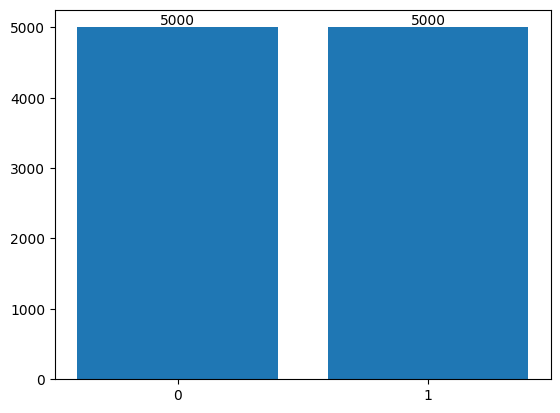

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

labels = [label for _, label in dataset]
all_label_counts = Counter(labels)

# visualise histogram
bar = plt.bar(all_label_counts.keys(), all_label_counts.values())
_ = plt.bar_label(bar)

# plot formatting
_ = plt.xticks([label for label in all_label_counts.keys()])

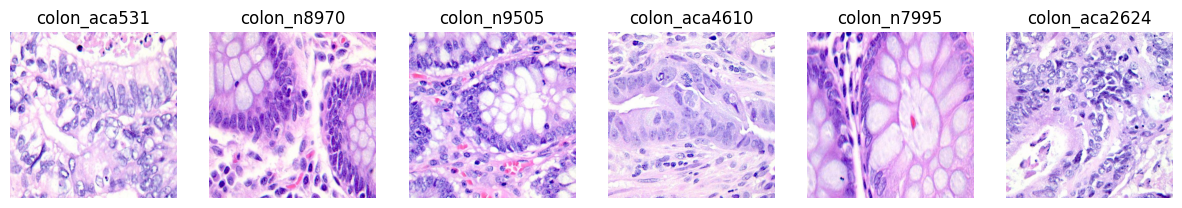

In [6]:
import matplotlib.pyplot as plt
import torch
import random

num_images = 6  
indices = random.sample(range(len(dataset)), num_images)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, idx in enumerate(indices):
    image, label = dataset[idx]
    #image = image.permute(1, 2, 0)
    
    axes[i].imshow(image)
    axes[i].axis("off")
    axes[i].set_title(dataset.classes[label] + str(idx))

plt.show()